In [16]:
# data manipulation 
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare_exercise


In [2]:
df = acquire.get_all_data()

In [5]:
df = prepare_exercise.prep_store_data(df)

In [9]:
aggregation = 'sum'

train = df[:'2016'].sale_amount.resample('D').agg(aggregation)
test = df['2017':].sale_amount.resample('D').agg(aggregation)

print('Observations: %d' % (len(train.values) + len(test.values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1826
Training Observations: 1461
Testing Observations: 365


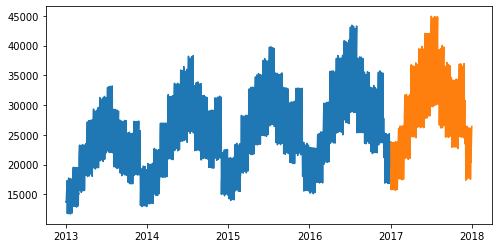

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(train) # we can also run it as: train.plot() and test.plot()
plt.plot(test)
plt.show()

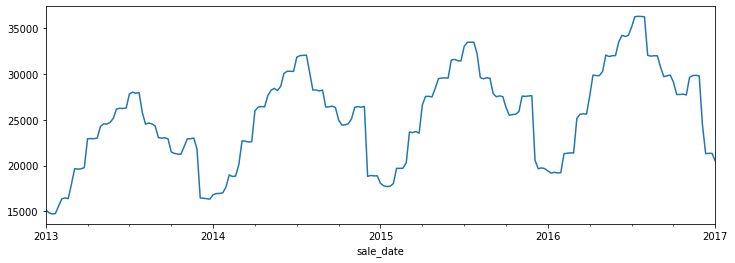

In [11]:
train.resample('W').mean().plot(figsize=(12, 4))
plt.show()

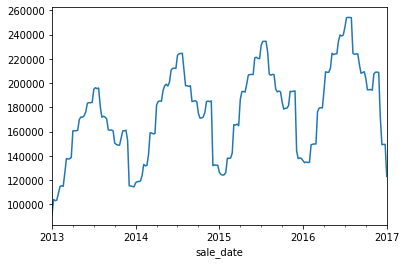

In [12]:

train.resample('W').sum().plot()
plt.show()

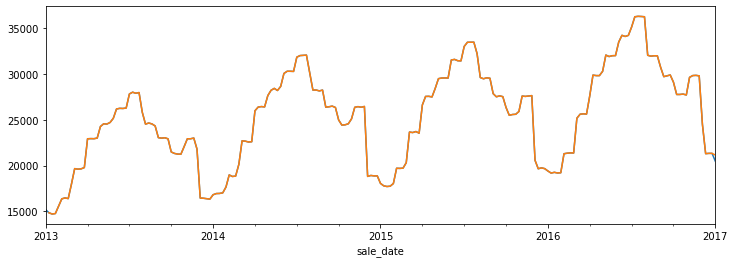

In [20]:
train.resample('W').mean().plot(figsize=(12, 4))
train.rolling(7).mean().plot(figsize=(12, 4))
plt.show()

In [ ]:
# for i in range(0,5):
#     plt.figure(figsize = (12,4))
#     plt.plot(X_train[train_indices[i]], y_train[train_indices[i]])
#     plt.plot(X[test_indices[i]], y[test_indices[i]])
